# Task 1: Analysis

## 1. Is there a difference in penalty conversion rates between men and women?

To summarise:
- we will load the data and look at penalty conversion rate for men and women.
- we will see how this changes at a timepoint roughly when women's league data becomes available.
- we will show that there are high-level differences in the conversion rates and complement this with a statistical study.

### Results
1. Pre 2018, the womens' conversion rate can be up to $20$ percentage points higher than the male conversion rate.
2. After 2018, the womens' conversion rate drops to nearer to the male conversion rate.
3. These differences are statistically significant.


### Notes
There are missing player names in the `player_name` column but each player has a unique id so it does not affect the results of this question and 
we omit checking for missing values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def load_and_prepare_data(filepath:str) -> pd.DataFrame:
    df = pd.read_csv(filepath)
    df['match_date'] = pd.to_datetime(df['match_date'])
    df["year"] = pd.to_datetime(df['match_date']).dt.year
    df["scored"] = df["event_type"].apply(lambda x: 1 if x in {"PG", "PSG"} else 0)
    return df

def get_male_df(df):
    return df[df["gender"] == "men"]

def get_female_df(df):
    return df[df["gender"] == "women"]

def get_yearly_scored_penalties(df):
    return df.groupby("year")["scored"].sum()

def get_yearly_conversion_table(df) -> pd.DataFrame:
    """
    Given an input dataframe for one of the two gender dataframes,
    return a dataframe with the mean conversion rate for each year (and standard deviation)
    along with the raw counts.
    """ 
    yearly_scored_df = get_yearly_scored_penalties(df)
    yearly_stats_df = df[["match_date", "year", "scored"]].groupby("year").agg({"scored": ["mean", "std", "count"]})
    yearly_stats_df.columns = ["mean", "std", "num_penalties"]
    return pd.merge(yearly_stats_df, yearly_scored_df, on='year')
    

In [4]:
all_df = load_and_prepare_data("../data/penalty_dataset.csv")
male_df = all_df[all_df["gender"] == "men"]
female_df = all_df[all_df["gender"] == "women"]

In [5]:
male_yearly_conversion = get_yearly_conversion_table(male_df)
female_yearly_conversion = get_yearly_conversion_table(female_df)
print("Conversion rates by year split by gender:\n")

# There is no data for years $2006$ and $2007$ for women, which is why they are also omitted for men in the annual conversion table below.  
# However, these years are included in the plot for men.
pd.merge(male_yearly_conversion, female_yearly_conversion, on='year', suffixes=["_male", "_female"])

Conversion rates by year split by gender:



,mean_male,std_male,num_penalties_male,scored_male,mean_female,std_female,num_penalties_female,scored_female
year,,,,,,,,
2003,1.000000,0.000000,73,73,1.000000,0.000000,8,8
2007,0.820896,0.383798,536,440,1.000000,0.000000,7,7
2008,0.852273,0.355166,528,450,1.000000,0.000000,7,7
2009,0.819113,0.385254,586,480,1.000000,0.000000,12,12
2010,0.787572,0.409322,692,545,1.000000,0.000000,18,18
2011,0.795518,0.403605,714,568,0.885714,0.320455,70,62
2012,0.782421,0.412897,694,543,1.000000,0.000000,40,40
2013,0.801460,0.399192,685,549,0.804348,0.401085,46,37
2014,0.754941,0.430406,759,573,1.000000,0.000000,19,19


Text(0.5, 0, 'Year')

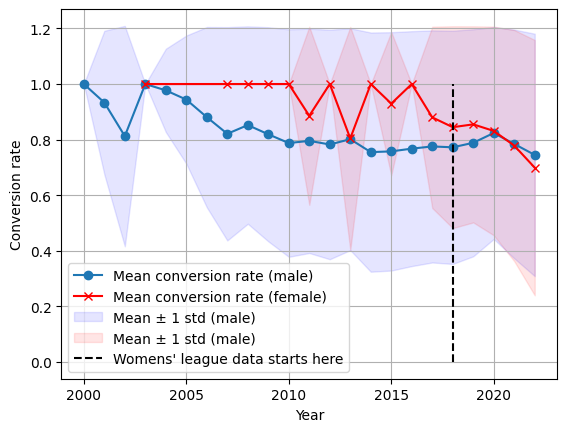

In [10]:
fig, ax = plt.subplots()

# Plot the mean
ax.plot(male_yearly_conversion.index, male_yearly_conversion["mean"].values,
        marker= "o", label="Mean conversion rate (male)")
ax.plot(female_yearly_conversion.index, female_yearly_conversion["mean"].values,
        marker="x",label="Mean conversion rate (female)", color="red")

# Add the standard deviation
ax.fill_between(male_yearly_conversion.index, 
                (male_yearly_conversion["mean"]-male_yearly_conversion["std"]).values, 
                (male_yearly_conversion["mean"]+male_yearly_conversion["std"]).values,
                color='b', alpha=0.1, label="Mean ± 1 std (male)")
ax.fill_between(female_yearly_conversion.index, 
                (female_yearly_conversion["mean"]-female_yearly_conversion["std"]).values, 
                (female_yearly_conversion["mean"]+female_yearly_conversion["std"]).values,
                color='red', alpha=0.1, label="Mean ± 1 std (male)")

ax.vlines([2018], 0, 1, linestyles='dashed', color='black', label="Womens' league data starts here")

ax.legend()
ax.grid()
ax.set_ylabel("Conversion rate")
ax.set_xlabel("Year")

In [11]:
fig.savefig("gender_comparison.jpg", dpi=400)

### Results 1 and 2

This plot shows that after about $2007$, the male conversion rate is stable, meanwhile the female rate is noisy.
The two rates are similar after $2018$, indicating a slight change in behaviour.
The change in rate for females looks to appear at abour $2016$, however, the scale of data is still smaller in $2016-2017$ compared to $2018$ onwards so we use this as the point of demarcation.

Prior to 2018 the women have much less consistent standard deviations which could be due to the relative scarcity of data compared to the male dataset (sometimes the ration between female penalties recorded and male penalties recorded is over $10\times$ different).  Once the number of penalties recorded is on the same scale, the deviations look similar.  The early years for the male dataset also have relatively scarce data compared to the more recent years.

There is a shift in performance before 2018 and after 2018 for women.  Male performance is roughly similar.
In the time period up to $2018$ womens' conversion rate noisily moves between $0.8$ and $1.0$ which is about $20$ percentage points higher than the typical
male conversion rate.  More sophisticate analysis is required thereafter.


### Result 3

We employ hypothesis testing to more emphatically answer _is there a difference in penalty conversion rates between men and women?_
This is an example of testing the independence of attributes `gender` and `conversion_rate`.
If `conversion_rate` is statistically independent of `gender`, then we expect that the conversion rates should be similar, irrespective of the whether `gender == male` or `gender == female`.

#### Test details
- We use the chi-squared test for independence which is valid since we have categorical input variables, all observations are assumed to be independent, the sample size is large (in this context greater than $5$ as otherwise we would use a different test) as in total it is on the order of thousands of observations.
- We test the null hypothesis that there is no statistical difference in penalty conversion rates between men and women.
- Roughly speaking, this test evaluates the difference between an observed count $O$ and and expected count $E$ under the null hypothesis and evaluates 
$(O-E)^2/E$.  These values are summed over all cells in the $2 \times 2$ possible output space.  If this sum is large, then the observed values are far from what is a likely observation under the null hypothesis so we reject the null hypothesis as it yields an unlikely result.
- The degrees of freedom (dof) for the test is $(nrows - 1)(ncols-1) = (2-1)(2-1) = 1$.

In [6]:
from scipy.stats import chi2_contingency

In [7]:
def perform_chi_squared_test(dataset):
    successful = dataset[dataset['event_type'].isin(['PG', 'PSG'])]
    successful_count = successful.groupby('gender').size()
    unsuccessful = dataset[~dataset['event_type'].isin(['PG', 'PSG'])]
    unsuccessful_count = unsuccessful.groupby('gender').size()

    contingency_table = pd.DataFrame({
        'Successful': successful_count,
        'Unsuccessful': unsuccessful_count
    })

    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return chi2, p_value

def analyse_period(df, start_date=None, end_date=None):
    if start_date and end_date:
        filtered_df = df[(df['match_date'] >= start_date) & (df['match_date'] <= end_date)]
    elif start_date:
        filtered_df = df[df['match_date'] >= start_date]
    elif end_date:
        filtered_df = df[df['match_date'] <= end_date]
    else:
        filtered_df = df

    chi2, p_value = perform_chi_squared_test(filtered_df)
    return chi2, p_value

In [8]:
# All Time Analysis
chi2_all, p_value_all = analyse_period(all_df)
print(f"2000 - 2018 Chi-squared: {chi2_all}, P-value: {p_value_all}")

# Pre-2018 Analysis
chi2_pre_2018, p_value_pre_2018 = analyse_period(all_df, end_date='2017-12-31')
print(f"Pre-2018 - Chi-squared: {chi2_pre_2018}, P-value: {p_value_pre_2018}")

# 2018 Onwards Analysis
chi2_post_2018, p_value_post_2018 = analyse_period(all_df, start_date='2018-01-01')
print(f"2018 Onwards - Chi-squared: {chi2_post_2018}, P-value: {p_value_post_2018}")

2000 - 2018 Chi-squared: 9.744833655544351, P-value: 0.0017982740452772128
Pre-2018 - Chi-squared: 40.123931846157674, P-value: 2.383510018098958e-10
2018 Onwards - Chi-squared: 0.7410418840306141, P-value: 0.3893273298077624


In [9]:
# All Time Analysis
chi2_all, p_value_all = analyse_period(all_df)
print(f"{'Period':<15}{'Chi-squared':<15}{'P-value':<15}")
print("-"*40)
print(f"{'2000 - 2018':<15}{chi2_all:<15.3f}{p_value_all:.5f}")

# Pre-2018 Analysis
chi2_pre_2018, p_value_pre_2018 = analyse_period(all_df, end_date='2017-12-31')
print(f"{'Pre-2018':<15}{chi2_pre_2018:<15.3f}{p_value_pre_2018:.5E}")

# 2018 Onwards Analysis
chi2_post_2018, p_value_post_2018 = analyse_period(all_df, start_date='2018-01-01')
print(f"{'2018 Onwards':<15}{chi2_post_2018:<15.3f}{p_value_post_2018:.5f}")

Period         Chi-squared    P-value        
----------------------------------------
2000 - 2018    9.745          0.00180
Pre-2018       40.124         2.38351E-10
2018 Onwards   0.741          0.38933


1. For the full period, the chi-squared test statistic is $9.745$ which has a $p$-value of $0.0018$.  
We can reject the null hypothesis at the $\alpha = 5\%$ level as $\alpha$ is larger than $p$.  This is often a sufficiently fine level to reject the null hypothesis.  So there is a statistically significant difference in conversion rate between men and women.
2. Pre-2018 Analysis: Chi-squared value is approximately 40.124 with a p-value of about $2.38e-10$, indicating a **very strong statistically significant difference** in penalty conversion rates between men and women before 2018.
3. 2018 Onwards Analysis: Chi-squared value is approximately 0.741 with a p-value of $0.389$. This suggests that there is no statistically significant difference in penalty conversion rates between men and women from 2018 onwards.

In conclusion, although it may have historically seemed that women had a better conversion rate, more recent evidence is not strong enough to maintain this belief. 